## Import Modules & Data

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

!pip install --quiet scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import xgboost as xgb
import lightgbm as lgb


import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.7 MB/s eta 0:00:00


In [34]:
#Load the dataset
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

#View the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Exploratory Data Analysis

In [35]:
# View the first few rows of the dataset
train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [37]:
train_df.shape

(891, 12)

In [38]:

# Get information about the dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# Generate summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization

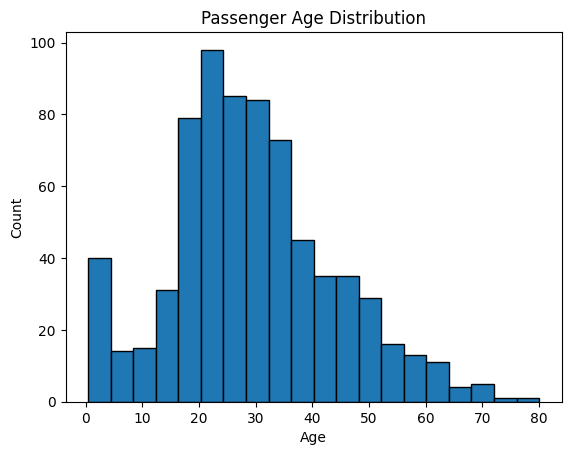

In [40]:
# Histogram of passenger ages
plt.hist(train_df["Age"].dropna(), bins=20, edgecolor="k")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passenger Age Distribution")
plt.show()

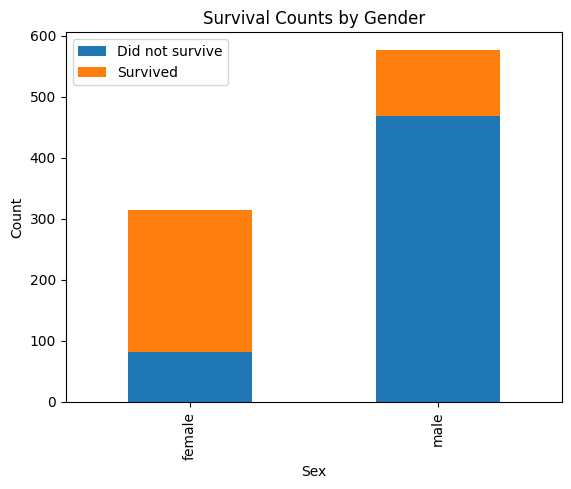

In [41]:
# Bar chart of survival counts based on gender
survived_by_gender = train_df.groupby("Sex")["Survived"].value_counts().unstack()
survived_by_gender.plot(kind="bar", stacked=True)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Counts by Gender")
plt.legend(["Did not survive", "Survived"])
plt.show()

## Missing Data

In [42]:
# Calculate percentage of missing values
missing_percentage = train_df.isnull().sum() / len(train_df) * 100

# Print columns with missing values and their corresponding percentages
print(missing_percentage[missing_percentage > 0])

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


Since the 'Cabin' column has over 77% missing values, it seems more reasonable to drop this collumn alltogether. For 'Age' and 'Embarked' we can impute a value, e.g. the mean or median (to lessen impact of outliers).

In [43]:
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

In [44]:
imputer = SimpleImputer(strategy="median")  # Use median for numerical features
train_df["Age"] = imputer.fit_transform(train_df[["Age"]]).ravel()  # Fill missing Age values with median
test_df["Age"] = imputer.fit_transform(test_df[["Age"]]).ravel()


In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Remove Unique Values Columns

In [46]:
# Check for columns with unique values
columns_with_unique_values = []
for column in train_df.columns:
    if train_df[column].nunique() == len(train_df):
        columns_with_unique_values.append(column)

# Print the columns with unique values
print("Columns with unique values:", columns_with_unique_values)

Columns with unique values: ['PassengerId', 'Name']


In [47]:
train_df.drop(['PassengerId'], axis=1, inplace=True) # We'll remove 'Name' later after we've extracted some feature information.

In [48]:
# # Calculate the percentage of unique values in the 'Ticket' column
# unique_tickets = train_df['Ticket'].nunique()
# total_tickets = train_df['Ticket'].count()
# percentage_unique_tickets = (unique_tickets / total_tickets) * 100

# # Print the percentage of unique tickets
# print("Percentage of unique tickets: {:.2f}%".format(percentage_unique_tickets))


Most of the values in the 'Ticket' column is unique as well. Let's remove it.

In [49]:
train_df.drop(['Ticket'], axis=1, inplace=True)
test_df.drop(['Ticket'], axis=1, inplace=True)

## Correlation Analysis

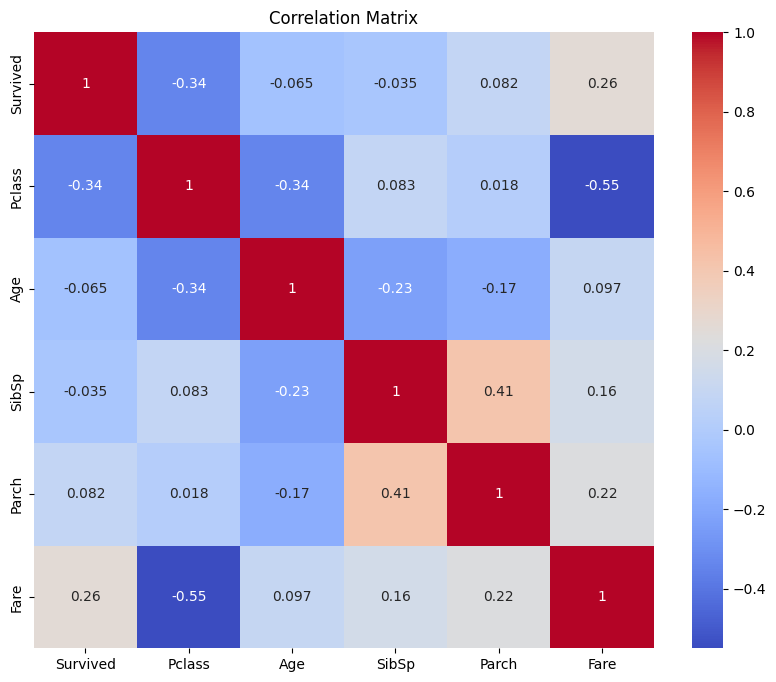

In [50]:
# Create a correlation matrix
numerical_df = train_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Survival Analysis

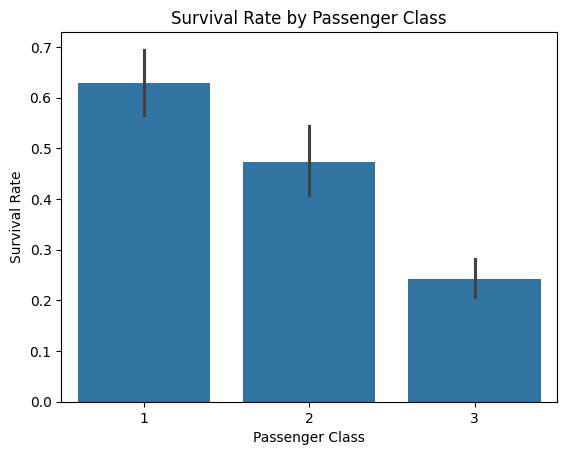

In [51]:
# Calculate survival rate by passenger class
survival_by_class = train_df.groupby("Pclass")["Survived"].mean()

# Bar chart of survival rate by passenger class
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.show()

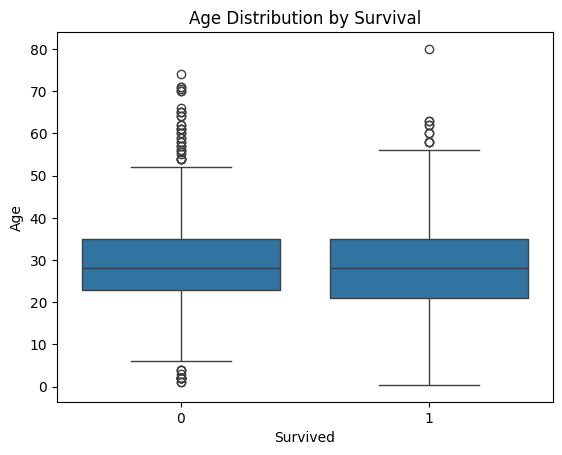

In [52]:
# Box plot of age distribution by survival
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age Distribution by Survival")
plt.show()

## Feature Engineering

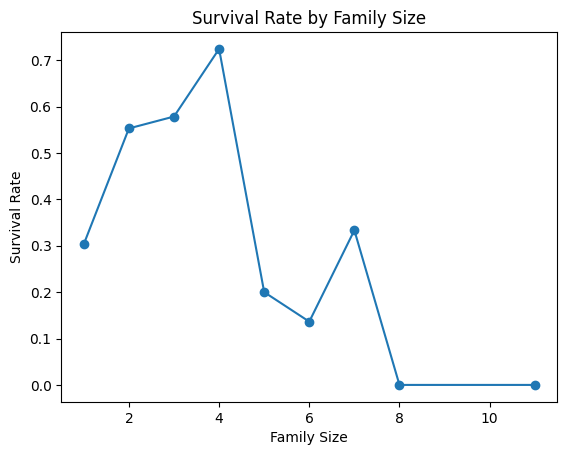

In [53]:
# Create a new feature for family size
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

# Calculate survival rate by family size
survival_by_family_size = train_df.groupby("FamilySize")["Survived"].mean()

# Line plot of survival rate by family size
plt.plot(survival_by_family_size.index, survival_by_family_size.values, marker="o")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.show()

In [54]:
# # Extract the titles from the 'Name' column using regular expressions
# train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create bins for age groups
bins = [0, 12, 18, 30, 50, 200]  # Adjust the age ranges as desired
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)

# Create bins for fare groups
bins = [0, 10, 30, 1000]  # Adjust the fare ranges as desired
labels = ['Low', 'Medium', 'High']
train_df['FareGroup'] = pd.cut(train_df['Fare'], bins=bins, labels=labels)
test_df['FareGroup'] = pd.cut(test_df['Fare'], bins=bins, labels=labels)

train_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)

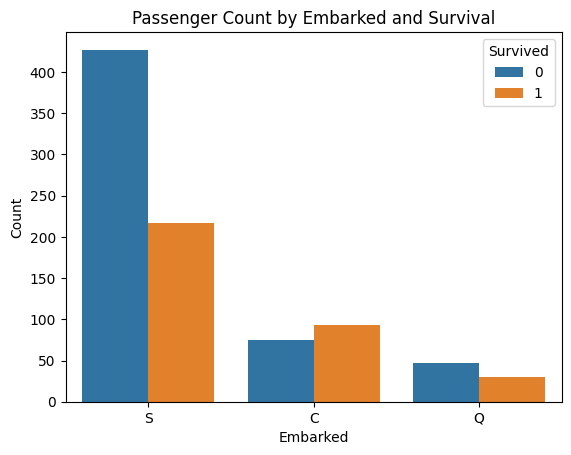

In [55]:
# Countplot of embarkation point and survival
sns.countplot(x="Embarked", hue="Survived", data=train_df)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Passenger Count by Embarked and Survival")
plt.show()

## Encode Categorical Data

In [56]:
encoder = OneHotEncoder(drop="first")  # Drop first category to avoid multicollinearity
encoded_features = pd.DataFrame(encoder.fit_transform(train_df[[
    "Sex",
    "Embarked",
    "AgeGroup",
    "FareGroup"
]]).toarray(),
  columns=encoder.get_feature_names_out([
      "Sex",
      "Embarked",
      "AgeGroup",
      "FareGroup"
  ]))
df_encoded = pd.concat([train_df, encoded_features], axis=1)

df_encoded.drop([
    'Sex',
    'Embarked',
    "AgeGroup",
    "FareGroup"
], axis=1, inplace=True)

In [57]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Embarked_nan,AgeGroup_Child,AgeGroup_Senior,AgeGroup_Teen,AgeGroup_Young Adult,FareGroup_Low,FareGroup_Medium,FareGroup_nan
0,0,3,22.0,1,0,7.2500,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Age                   891 non-null    float64
 3   SibSp                 891 non-null    int64  
 4   Parch                 891 non-null    int64  
 5   Fare                  891 non-null    float64
 6   FamilySize            891 non-null    int64  
 7   Sex_male              891 non-null    float64
 8   Embarked_Q            891 non-null    float64
 9   Embarked_S            891 non-null    float64
 10  Embarked_nan          891 non-null    float64
 11  AgeGroup_Child        891 non-null    float64
 12  AgeGroup_Senior       891 non-null    float64
 13  AgeGroup_Teen         891 non-null    float64
 14  AgeGroup_Young Adult  891 non-null    float64
 15  FareGroup_Low         8

## Models

In [59]:
# Separate the features (X) and target variable (y)
X = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]

### Logistic Regression

In [60]:
# Instantiate the model
lr_model = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(lr_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.79888268 0.78089888 0.78651685 0.7752809  0.82022472]
Mean cross-validation score: 0.7923608059757705


### Multiple Models and Hyperparameter Tuning

In [ ]:
trained_models = []

# Define parameter spaces for each model
param_spaces = {
    'LogisticRegression': {
        'C': Real(1e-3, 1e3, prior='log-uniform'),
    },
    'RandomForest': {
        'n_estimators': Integer(50, 500),
        'max_depth': Integer(2, 50),
    },
    'GradientBoosting': {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
        'max_depth': Integer(2, 20),
    },
    'SVC': {
        'C': Real(1e-3, 1e3, prior='log-uniform'),
        'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
    },
    'MLP': {
        'hidden_layer_sizes': Integer(10, 200),
        'alpha': Real(1e-5, 1e-1, prior='log-uniform'),
    },
    'XGBoost': {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
        'max_depth': Integer(2, 20),
    },
    'LightGBM': {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
        'num_leaves': Integer(10, 100),
    }
}

# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(probability=True),
    'MLP': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

model_scores = {}

# Perform Bayesian optimization for each model
for model_name, base_model in models.items():
    print(f"Optimizing {model_name}...")

    # Create BayesSearchCV object
    bayes_cv = BayesSearchCV(
        estimator=base_model,
        search_spaces=param_spaces[model_name],
        n_iter=50,  # Number of parameter settings to sample (similar to Optuna's n_trials)
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    # Fit the model
    bayes_cv.fit(X, y)

    # Store the best model and score
    best_model = bayes_cv.best_estimator_
    model_scores[model_name] = bayes_cv.best_score_

    # Perform cross-validation with best model
    scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

    print(f"{model_name}:")
    print("Best parameters:", bayes_cv.best_params_)
    print("Cross-validation scores:", scores)
    print("Mean cross-validation score:", scores.mean())
    print()

# Find the best and worst models
best_model_name = max(model_scores, key=model_scores.get)
worst_model_name = min(model_scores, key=model_scores.get)

print("Best Model:", best_model_name)
print("Cross-validation score:", model_scores[best_model_name])
print()

print("Worst Model:", worst_model_name)
print("Cross-validation score:", model_scores[worst_model_name])
print()

# Create list of trained models for ensemble
trained_models = [(name, models[name].set_params(**BayesSearchCV(
    models[name],
    param_spaces[name],
    n_iter=50,
    cv=5,
    scoring='accuracy'
).fit(X, y).best_params_)) for name in models.keys()]

# Create and evaluate ensemble
ensemble = VotingClassifier(trained_models)
ensemble_scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')
ensemble_score_mean = ensemble_scores.mean()

print("Ensemble of all models:")
print("Cross-validation scores:", ensemble_scores)
print("Mean cross-validation score:", ensemble_score_mean)

Optimizing LogisticRegression...
LogisticRegression:
Best parameters: OrderedDict([('C', 0.3561795910734641)])
Cross-validation scores: [0.80446927 0.79213483 0.79213483 0.79213483 0.8258427 ]
Mean cross-validation score: 0.8013432929508506

Optimizing RandomForest...


## Submit on Test

### Preprocess Test Data

In [ ]:
test_df.info()

In [ ]:
# Calculate percentage of missing values
missing_percentage = test_df.isnull().sum() / len(test_df) * 100

# Print columns with missing values and their corresponding percentages
print(missing_percentage[missing_percentage > 0])

'Fare' has missing data in the Test set, while it didn't in Train. Let's impute using the average.

In [ ]:
imputer = SimpleImputer(strategy="mean")  # Use mean for numerical features
test_df["Fare"] = imputer.fit_transform(test_df[["Fare"]]).ravel()  # Fill missing Age values with mean
test_df.info()

In [ ]:
encoder = OneHotEncoder(drop="first")
encoded_features = pd.DataFrame(encoder.fit_transform(test_df[[
    "Sex",
    "Embarked",
    "AgeGroup",
    "FareGroup"
]]).toarray(),
  columns=encoder.get_feature_names_out([
    "Sex",
    "Embarked",
    "AgeGroup",
    "FareGroup"
                                ]))
test_df_encoded = pd.concat([test_df, encoded_features], axis=1)

test_df_encoded.drop([
    'Sex',
    'Embarked',
    "AgeGroup",
    "FareGroup"
], axis=1, inplace=True)




'Embarked' didn't have any missing values in Test, while it did in Train. The encoder will therefore not add an 'Embarked_nan' column. Since both our Train and Test df have to match when predicting on Test, let's add the column manually and fill it with 0s.


In [ ]:

test_df_encoded.insert(test_df_encoded.columns.get_loc('Embarked_S') + 1, 'Embarked_nan', 0)


In [ ]:
test_df_encoded.head()

In [ ]:
# Separate the features (X_test) and 'PassengerId'
X_test = test_df_encoded.drop("PassengerId", axis=1)

### Fit & Predict

In [ ]:
# Instantiate the ensemble model with the best models from the previous step
ensemble = VotingClassifier(models)

# Fit the ensemble model on the entire training data
ensemble.fit(X, y)

In [ ]:
# Make predictions on the test data
predictions = ensemble.predict(X_test)


## Submission

In [ ]:
# Create a DataFrame with 'PassengerId' and 'Survived' columns
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission_df.head()

In [ ]:
# Save the predictions to a CSV file
submission_df.to_csv("submission.csv", index=False)